In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("website_data_with_classifications.csv")
df.head()

,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,Gifts Men | 11 Industries | Gentleman's Genera...,5651.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,Distillery | 11 Wells Distillery | Saint Paul ...,2082.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...","14th Rose - Handbags, Purses, Woman's Bags Fre...",3799.0
3,NaN,NaN,"Welcome Regal Ware, Inc. global leader quality...","Welcome Regal Ware, Inc. global leader quality...","Welcome Regal Ware, Inc. global leader quality...","Welcome Regal Ware, Inc. global leader quality...","Welcome Regal Ware, Inc. global leader quality...","Welcome Regal Ware, Inc. global leader quality...","Welcome Regal Ware, Inc. global leader quality...","Welcome Regal Ware, Inc. global leader quality...",...,Regal Ware | Enriching Life Bringing Families ...,Regal Ware | Enriching Life Bringing Families ...,Regal Ware | Enriching Life Bringing Families ...,Regal Ware | Enriching Life Bringing Families ...,Regal Ware | Enriching Life Bringing Families ...,Home - Regal Ware Work Core Values Story Leade...,Home - Regal Ware Work Core Values Story Leade...,Home - Regal Ware Work Core Values Story Leade...,Home - Regal Ware Work Core Values Story Leade...,5082.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,Custom Swim Parkas Wholesale Fleece Jackets | ...,2369.0


In [8]:
check_times = [
    "2006-01",
    "2008-01",
    "2010-01",
    "2012-01",
    "2014-01",
    "2016-01",
    "2018-01",
    "2020-01",
    "2022-01",
]
categories_by_time = {}

In [12]:
for month_year in check_times:
    rows_where_exists = df[month_year].notna()
    categories = df.loc[rows_where_exists, "category"].values
    categories_by_time[month_year] = categories

In [25]:
def sort_dict(d):
    return {k: d[k] for k in sorted(d.keys())}

In [83]:
processed_categories_dict = {}

for month_year in categories_by_time:
    counts = pd.Series(categories_by_time[month_year]).value_counts()
    
    # while the number of elements is less than 10, i'm going to strip off a character over the least common one and then check to see if it can be grouped with anything else
    categories_dict = {}
    for category, count in counts.items():
        category_str = str(int(category))
        category_str = "0" * (4 - len(category_str)) + category_str
        categories_dict[category_str] = count

    print("There are ", len(categories_dict), " categories: ", categories_dict)
    miscellaneous = categories_dict["0000"]
    del categories_dict["0000"]

    new_categories_dict = {}
    for category, count in categories_dict.items():
        prefix = category[:2]
        if prefix in new_categories_dict:
            new_categories_dict[prefix] += count
        else:
            new_categories_dict[prefix] = count

    categories_dict = new_categories_dict
    
    # while len(categories_dict) > 30:
    #     least_common_count = 1e9
    #     least_common_category = ""
    #     for (item, value) in categories_dict.items():
    #         if len(item) == 1:
    #             continue
    #         if value < least_common_count:
    #             least_common_count = value
    #             least_common_category = item
        
    #     new_category = least_common_category[:-1]
        
    #     if new_category in categories_dict:
    #         categories_dict[new_category] += least_common_count
    #         del categories_dict[least_common_category]
    #     else:
    #         categories_dict[new_category] = least_common_count

    categories_dict = sort_dict(categories_dict)
    categories_dict["Miscellaneous"] = miscellaneous

    processed_categories_dict[month_year] = categories_dict
    print("After processing are: ", len(categories_dict), " categories: ", categories_dict)


There are  261  categories:  {'5732': 111, '3714': 110, '5651': 109, '5084': 103, '5712': 63, '3441': 58, '3949': 58, '5141': 49, '5941': 42, '0000': 39, '2082': 37, '3721': 31, '5085': 31, '2511': 31, '5149': 27, '3661': 26, '2369': 23, '7342': 23, '3711': 23, '5812': 23, '3941': 22, '3149': 22, '3663': 21, '2061': 21, '0111': 19, '5999': 18, '2834': 17, '3799': 16, '2041': 15, '5099': 15, '3669': 15, '3631': 15, '3499': 14, '3531': 14, '5251': 13, '3699': 13, '5082': 13, '3089': 13, '2841': 13, '2399': 13, '5012': 12, '3792': 12, '3169': 11, '5044': 11, '3724': 11, '3579': 11, '7389': 11, '5611': 10, '3532': 10, '5734': 10, '3111': 9, '3569': 9, '3841': 9, '5074': 9, '5094': 9, '2599': 8, '2431': 8, '5072': 8, '2321': 7, '7222': 7, '3574': 7, '7373': 7, '0141': 7, '2329': 7, '5111': 7, '3421': 6, '3942': 6, '3520': 6, '8911': 6, '4221': 6, '2519': 6, '4911': 6, '2541': 6, '6111': 6, '2434': 5, '5014': 5, '3624': 5, '4613': 5, '3634': 5, '2299': 5, '2389': 5, '5091': 4, '3999': 4, '73

In [ ]:
# got SIC codes from: https://github.com/saintsjd/sic4-list/tree/master

In [84]:
industry_groups = pd.read_csv("industry-groups.csv")
major_groups = pd.read_csv("major-groups.csv")
sic_groups = pd.read_csv("sic-codes.csv")

In [85]:
massive_groups = {
    "0": "Agriculture, Forestry, and Fishing",
    "1": "Mining and Construction",
    "2": "Manufacturing (Food, Textile, Lumber, Furniture, Paper, Printing)",
    "3": "Manufacturing (Chemicals, Petroleum, Rubber, Leather, Stone, Metal, Machinery, Equipment)",
    "4": "Transportation, Communications, Electric, Gas, and Sanitary Services",
    "5": "Wholesale and Retail Trade",
    "6": "Finance, Insurance, and Real Estate",
    "7": "Services (Hotels, Personal, Business, Auto, Repair, Motion Pictures)",
    "8": "Services (Health, Legal, Educational, Social, Museums, Membership Organizations)",
    "9": "Public Administration and Nonclassifiable Establishments"
}

In [96]:
sic_groups["SIC"] = sic_groups["SIC"].astype(int)
industry_groups["Industry Group"] = industry_groups["Industry Group"].astype(int)
major_groups["Major Group"] = major_groups["Major Group"].astype(int)

In [98]:
named_categories_dict = {}
for month_year in processed_categories_dict:
    categories_dict = processed_categories_dict[month_year]
    new_categories_dict = {}
    for category in categories_dict:
        try:
            category_int = int(category)
            if len(category) == 4:
                name = category + ": " + sic_groups.loc[sic_groups["SIC"] == category_int, "Description"].values[0]
            elif len(category) == 3:
                name = category + ": " + industry_groups.loc[industry_groups["Industry Group"] == category_int, "Description"].values[0]
            elif len(category) == 2:
                name = category + ": " + major_groups.loc[major_groups["Major Group"] == category_int, "Description"].values[0]
            elif len(category) == 1:
                name = category + ": " + massive_groups[category]
        except Exception as e:
            print("Exception: ", category, e)
            name = "Miscellaneous"
        new_categories_dict[name] = categories_dict[category]
    named_categories_dict[month_year] = new_categories_dict
    print("After naming are: ", len(new_categories_dict), " categories: ", new_categories_dict)

Exception:  00 index 0 is out of bounds for axis 0 with size 0
Exception:  06 index 0 is out of bounds for axis 0 with size 0
Exception:  19 index 0 is out of bounds for axis 0 with size 0
Exception:  Miscellaneous invalid literal for int() with base 10: 'Miscellaneous'
After naming are:  55  categories:  {'Miscellaneous': 39, '01: Agricultural Production Crops': 33, '02: Agriculture production livestock and animal specialties': 4, '07: Agricultural Services': 2, '15: Building Construction General Contractors And Operative Builders': 2, '20: Food And Kindred Products': 89, '21: Tobacco Products': 3, '22: Textile Mill Products': 16, '23: Apparel And Other Finished Products Made From Fabrics And Similar Materials': 57, '24: Lumber And Wood Products, Except Furniture': 15, '25: Furniture And Fixtures': 55, '26: Paper And Allied Products': 5, '27: Printing, Publishing, And Allied Industries': 2, '28: Chemicals And Allied Products': 35, '29: Petroleum Refining And Related Industries': 2, '3

After sorting and filtering are:  55  categories:  {'01: Agricultural Production Crops': 33, '02: Agriculture production livestock and animal specialties': 4, '07: Agricultural Services': 2, '15: Building Construction General Contractors And Operative Builders': 2, '20: Food And Kindred Products': 89, '21: Tobacco Products': 3, '22: Textile Mill Products': 16, '23: Apparel And Other Finished Products Made From Fabrics And Similar Materials': 57, '24: Lumber And Wood Products, Except Furniture': 15, '25: Furniture And Fixtures': 55, '26: Paper And Allied Products': 5, '27: Printing, Publishing, And Allied Industries': 2, '28: Chemicals And Allied Products': 35, '29: Petroleum Refining And Related Industries': 2, '30: Rubber And Miscellaneous Plastics Products': 20, '31: Leather And Leather Products': 50, '32: Stone, Clay, Glass, And Concrete Products': 6, '33: Primary Metal Industries': 4, '34: Fabricated Metal Products, Except Machinery And Transportation Equipment': 90, '35: Industria

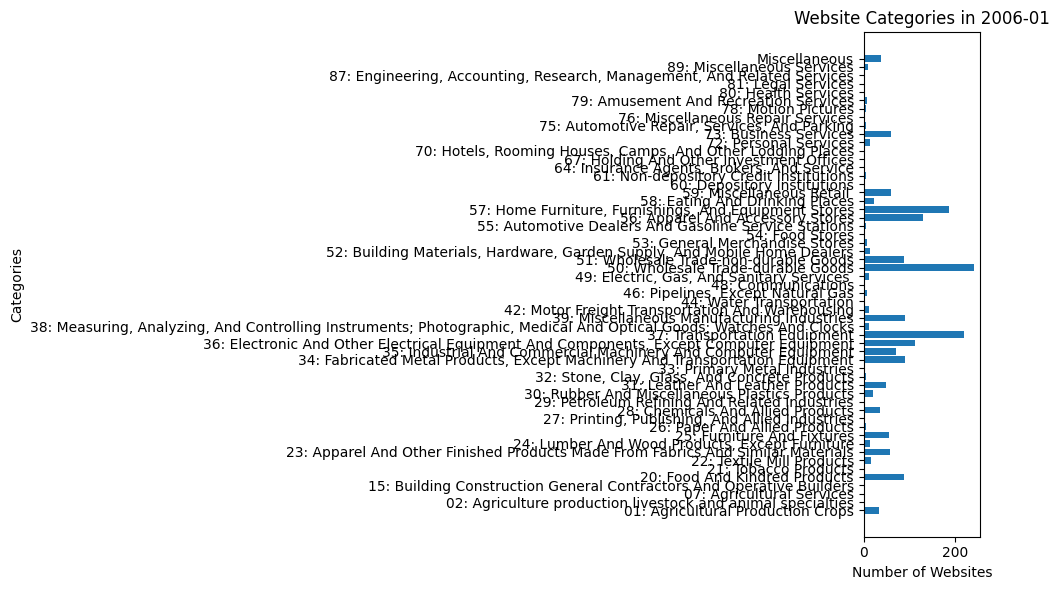

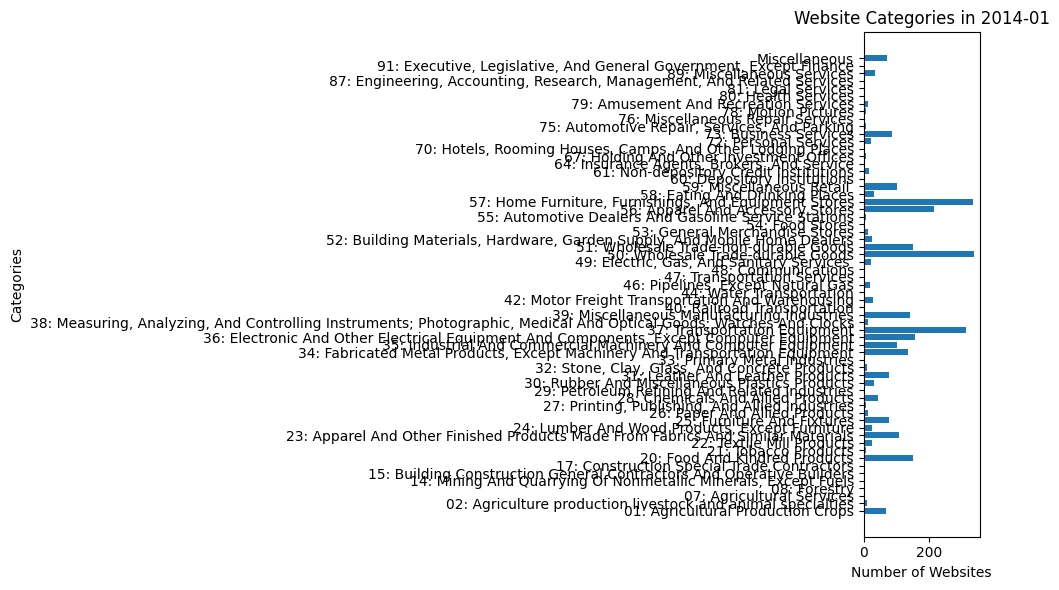

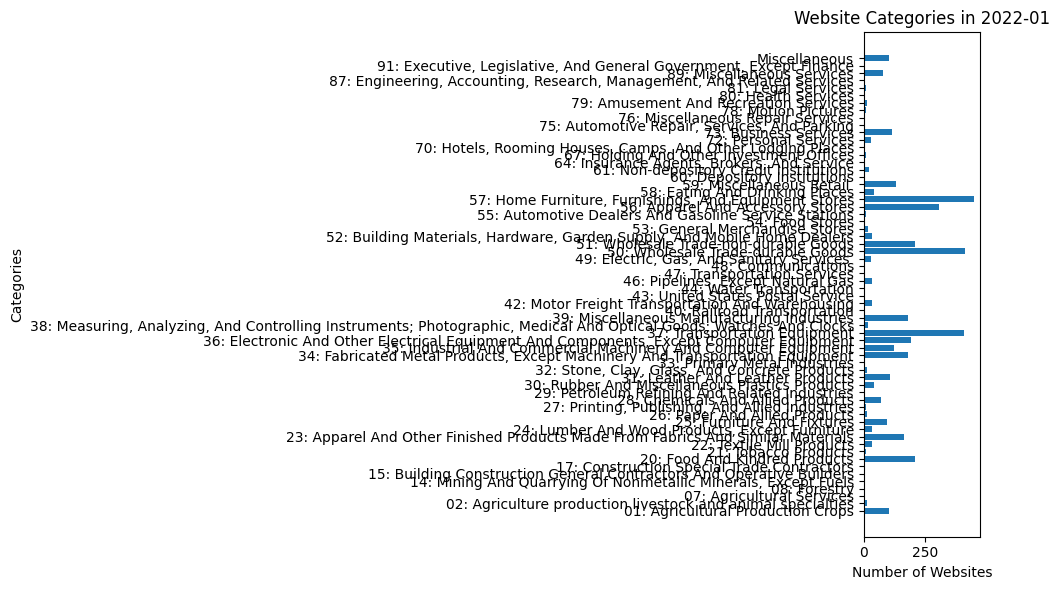

In [99]:
important_months = [
    "2006-01",
    "2014-01",
    "2022-01"
]
for month_year in important_months:
    categories_dict = named_categories_dict[month_year]
    categories_dict = sort_dict(categories_dict)
    categories_dict = {k: v for k, v in categories_dict.items() if v > 0}
    print("After sorting and filtering are: ", len(categories_dict), " categories: ", categories_dict)
    
    plt.figure(figsize=(10, 6))
    plt.barh(list(categories_dict.keys()), list(categories_dict.values()))
    plt.title(f"Website Categories in {month_year}")
    plt.xlabel("Number of Websites")
    plt.ylabel("Categories")
    plt.tight_layout()
    plt.savefig(f"website_categories_{month_year}.png")

In [100]:
important_months = {
    "2006-01": "2006",
    "2014-01": "2014",
    "2022-01": "2022"
}

graph_data = {

}

sums = {
    "2006": 0,
    "2014": 0,
    "2022": 0
}

for month_year in important_months:
    categories_dict = named_categories_dict[month_year]
    categories_dict = sort_dict(categories_dict)
    categories_dict = {k: v for k, v in categories_dict.items() if v > 0}
    print("After sorting and filtering are: ", len(categories_dict), " categories: ", categories_dict)
    for category in categories_dict:
        if category not in graph_data:
            graph_data[category] = {}
        graph_data[category][important_months[month_year]] = categories_dict[category]
        sums[important_months[month_year]] += categories_dict[category]

After sorting and filtering are:  55  categories:  {'01: Agricultural Production Crops': 33, '02: Agriculture production livestock and animal specialties': 4, '07: Agricultural Services': 2, '15: Building Construction General Contractors And Operative Builders': 2, '20: Food And Kindred Products': 89, '21: Tobacco Products': 3, '22: Textile Mill Products': 16, '23: Apparel And Other Finished Products Made From Fabrics And Similar Materials': 57, '24: Lumber And Wood Products, Except Furniture': 15, '25: Furniture And Fixtures': 55, '26: Paper And Allied Products': 5, '27: Printing, Publishing, And Allied Industries': 2, '28: Chemicals And Allied Products': 35, '29: Petroleum Refining And Related Industries': 2, '30: Rubber And Miscellaneous Plastics Products': 20, '31: Leather And Leather Products': 50, '32: Stone, Clay, Glass, And Concrete Products': 6, '33: Primary Metal Industries': 4, '34: Fabricated Metal Products, Except Machinery And Transportation Equipment': 90, '35: Industria

In [101]:
graph_data_delta = {
    
}
for category in graph_data:
    if "2006" not in graph_data[category] or "2014" not in graph_data[category] or "2022" not in graph_data[category]:
        continue

    graph_data_delta[category] = {
        "2006-2014": (((graph_data[category]["2014"] / sums["2014"])) - (graph_data[category]["2006"] / sums["2006"])) * 100,
        "2014-2022": (((graph_data[category]["2022"] / sums["2022"])) - (graph_data[category]["2014"] / sums["2014"])) * 100
    }

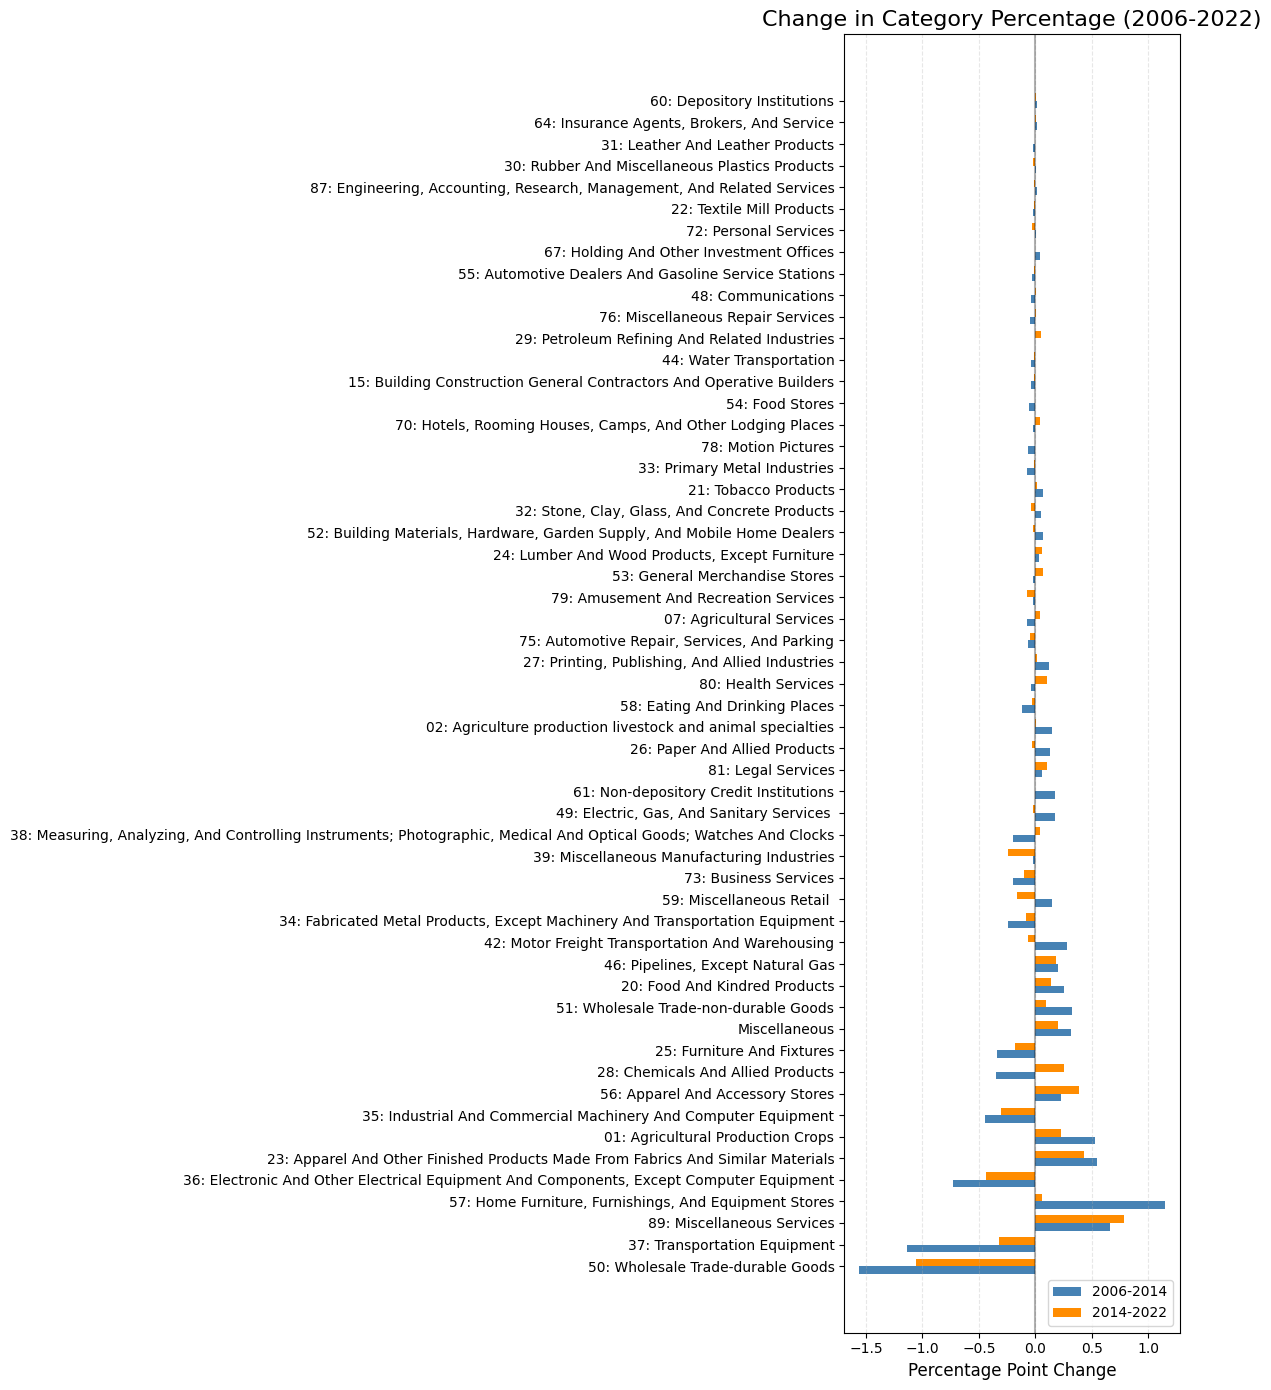

In [102]:
import numpy as np

# Set up a single figure
fig, ax = plt.subplots(figsize=(12, 14))

# Define common parameters
categories = list(graph_data_delta.keys())
categories_2006_2014 = [graph_data_delta[category]["2006-2014"] for category in graph_data_delta]
categories_2014_2022 = [graph_data_delta[category]["2014-2022"] for category in graph_data_delta]

# Sort categories by the combined absolute values
combined_values = [abs(a) + abs(b) for a, b in zip(categories_2006_2014, categories_2014_2022)]
sorted_indices = np.argsort(combined_values)[::-1]  # Descending order
sorted_categories = [categories[i] for i in sorted_indices]
sorted_2006_2014 = [categories_2006_2014[i] for i in sorted_indices]
sorted_2014_2022 = [categories_2014_2022[i] for i in sorted_indices]

# Plot both time periods
y_pos = np.arange(len(sorted_categories))
width = 0.35

# First period
ax.barh(y_pos - width/2, sorted_2006_2014, width, label='2006-2014', color='steelblue')

# Second period
ax.barh(y_pos + width/2, sorted_2014_2022, width, label='2014-2022', color='darkorange')

# Add labels and legend
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_categories)
ax.set_xlabel('Percentage Point Change', fontsize=12)
ax.set_title('Change in Category Percentage (2006-2022)', fontsize=16)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()